# Module 6, Activity 1: Maps, Projections and Extent

In this Module, we're exploring how to visualise 2D spatial data with [**cartopy**](https://scitools.org.uk/cartopy/docs/latest/) and [**geopandas**](https://geopandas.org/en/stable/). Cartopy supports 'GeoAxes', a subclass of a normal Matplotlib Axes which adds the extra functionality we need to draw maps. 
Geopandas, is simply pandas but with addition of geometry (spatial shapes). It also has some plotting capabilities that we won't explore here - we'll be using it for loading and manipulating spatial dataframes.  Cartopy is built on Matplotlib, so we'll be on familiar ground with syntax.

In this activity, we'll start by exploring how to create a base map for your visualisation, setting its projection and then furnishing it with feautres before setting its extent. Before we do that, let's load the packages we'll be using in the activities this Module. If you don't have geopandas or cartopy installed, make sure you do that first.

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import geopandas as gpd
import pandas as pd

import cartopy.crs as ccrs
import cartopy.feature as cfeature

## Drawing a basemap

A basemap is just the reference map which you can overlay other spatial data on. They are designed to give spatial context to mapped information. To draw our basemap, we first need to tell Python what projection we are using. Let's stick with the most basic one first the 'PlateCarree' or equirectangular projection. This is one of the most common projections used for spatial data.

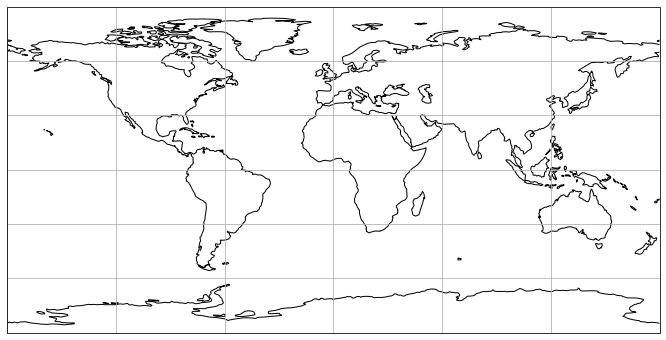

In [2]:
# Create a figure and define the axes CRS
plt.figure(figsize=(12, 6))
crss = ccrs.PlateCarree()
ax=plt.axes(projection=crss)
ax.coastlines() # inbuilt function to add the world coastline
ax.gridlines() # inbuilt function to add gridlines
plt.show()

**Exercises:** 
1) Experiment with different projections from [here](https://scitools.org.uk/cartopy/docs/latest/reference/projections.html#cartopy-projections).\
2) The basemap above is useful if we wanted to look at land-based spatial data, since it doesn't split any countries (except a tiny bit of Russia). But, what if we were interested in the oceans? Then, we'd want to split as few ocean basins as possible, so we'd want to shift our basemap around a bit, since the current map splits the Pacific Ocean. To address this, experiment with the central_longitude variable in the production function, so that the map begins at 25 or 125 degrees east (splitting Africa or Australia/Asia). Use [here](https://scitools.org.uk/cartopy/docs/latest/reference/projections.html#cartopy-projections) as a starting reference. Note that you'll need to add 180 degrees to start at 0 degrees east (the prime meridian), since this projection defaults to setting -180 degrees east as the reference latitude.

## Adding features to your basemap

So, we now have a basemap of the world's coastlines. Now, let's furnish our basemap with geographic features. We can do this easily using the [**cartopy.feature**](https://scitools.org.uk/cartopy/docs/latest/reference/feature.html), called by the **add_feature** axes artist. Cartopy has a range of built-in features that can be added very easily this way. Let's explore some of them now.

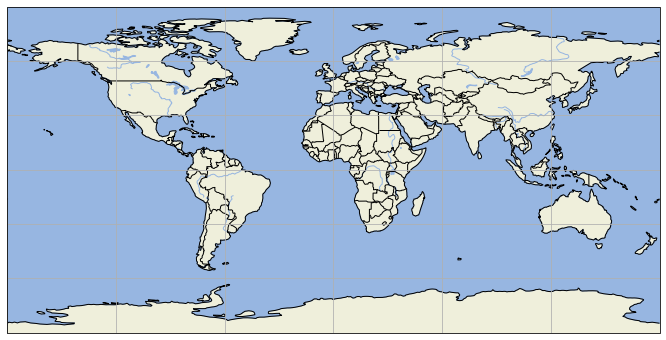

In [3]:
# Create a figure and define the axes CRS
plt.figure(figsize=(12, 6))
crss = ccrs.PlateCarree()
ax=plt.axes(projection=crss)

ax.add_feature(cfeature.LAND) # Add land
ax.add_feature(cfeature.OCEAN) # Add oceans
ax.add_feature(cfeature.LAKES) # Add lakes
ax.add_feature(cfeature.RIVERS) # Add rivers
ax.add_feature(cfeature.BORDERS) # Add national borders
ax.coastlines() # inbuilt function to add the world coastline
ax.gridlines() # inbuilt function to add gridlines

# Plot
plt.show()

**Exercise:** The defaults colours nice, but we can change the boundary and face colours of each of these attributes, by specifing **edgecolor** and **facecolor**. Experiment with the edge and face colours of the different features, using the RGB colour wheel [here](https://www.canva.com/colors/color-wheel/) to get codes for different colours.

These built-in features come from [Natural Earth](https://www.naturalearthdata.com/), an invaluable resource for creating custom large-scale 2D spatial visualisations. Cartopy can directly access the Natural Earth [database](https://github.com/nvkelso/natural-earth-vector) on Github, using the **NaturalEarthFeature** function, so you can customise the features you want on your map. Let's try it out, adding major urban areas to our global map.

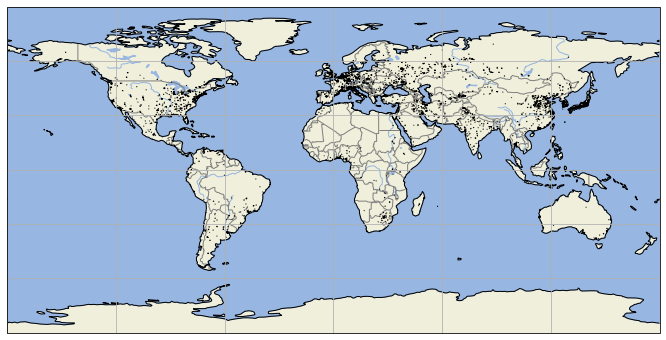

In [5]:
# Create and Add your layers to axes
cities = cfeature.NaturalEarthFeature(category = 'cultural', # Category of data, either cultural or physical
                                          name = 'urban_areas', # Name of variable
                                          scale = '50m') # Resolution, either 10m, 50m or 110m

crss = ccrs.PlateCarree()

plt.figure(figsize=(12, 6))
ax=plt.axes(projection=crss)

ax.add_feature(cfeature.LAND) # Add land
ax.add_feature(cfeature.OCEAN) # Add oceans
ax.add_feature(cfeature.LAKES) # Add lakes
ax.add_feature(cfeature.RIVERS) # Add rivers
ax.add_feature(cfeature.BORDERS, edgecolor = "gray") # Add national borders
ax.gridlines() # inbuilt function to add gridlines
ax.coastlines() # inbuilt function to add coastlines

ax.add_feature(cities, edgecolor="black", facecolor = "black") # Add our cities feature

# Plot
plt.show()

So how does **NaturalEarthFeature** work? First, you can see the full list of available features [here](https://www.naturalearthdata.com/features/). The function loads files from the [Natural Earth Github repository](https://github.com/nvkelso/natural-earth-vector) that you specify, using the category, name and scale variables. So, above we asked **NaturalEarthFeature** to plot urban areas, with a 1:50m resolution (see information about the different spatial resolution of Natural Earth features [here](https://www.naturalearthdata.com/downloads/). The **category** and **scale** arguments told the function it needed to open the 50m_cultural folder in the Natural Earth Github. Then, the **name** argument directed the function to load the ne_50m_urban_areas shapefiles (note the name argument - urban_areas - was the last part of the filenames that make up the shapefile). 

Natural Earth is an excellent resource, but as you can see, it requires a bit of manual work to identify what feature/s you want from the Natural Earth website, then opening them with correct **category**, **scale** and **name** arguments in the **NaturalEarthFeature** function. We encourage you to explore what's available on the Natural Earth website, and try and add some additional features to the global map above. But, if you find things don't work with the knowledge you have so far, don't worry. For example, we need to learn a bit more before we can plot spatial point data like cities and towns. We'll revisit Natural Earth a little bit more in some of the other activities in the Module.

**Exercise:** If we're interested in the global distribution of urban areas, the figure above is not very useful. We need to simplify the map by stripping back features and changing the edge and face colours of the different features. Experiment with face and edge colours of the different plot features to see if you can make the urban areas more easily visible. Also explore removing different features to see if that makes urban areas more visible. HINT: Start by removing coastlines.

So far, we've only made a global map, but what if we wanted to visualise spatial data for a smaller region? For example, what if we wanted to focus on Europe? To do that, we need to specify the extent of our map. We can do this easily with the **set_extent** function. Let's do that now:

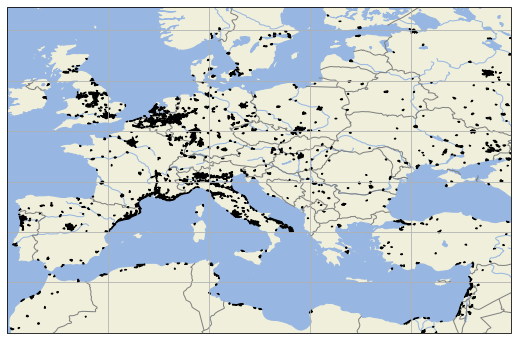

In [6]:
# Create and Add your layers to axes
cities = cfeature.NaturalEarthFeature(category = 'cultural', # Category of data, either cultural or physical
                                          name = 'urban_areas', # Name of variable
                                          scale = '50m') # Resolution, either 10m, 50m or 110m

crss = ccrs.PlateCarree()
plt.figure(figsize=(12, 6))
ax=plt.axes(projection=crss)

ax.add_feature(cfeature.LAND) # Add land
ax.add_feature(cfeature.OCEAN) # Add oceans
ax.add_feature(cfeature.LAKES) # Add lakes
ax.add_feature(cfeature.RIVERS) # Add rivers
ax.add_feature(cfeature.BORDERS, edgecolor = "gray") # Add national borders
ax.gridlines() # inbuilt function to add gridlines
ax.add_feature(cities, edgecolor="black", facecolor = "black") # Add our cities feature

ax.set_extent([-10, # Longitude lower bound (degrees east)
               40, # Longitude upper bound (degrees east)
               30, # Latitude lower bound (degrees north)
               60]) # Latitude upper bound (degrees north)

# Plot
plt.show()


**Exercise:** Experiment with the **set_extent** function. For example, what if we were interested in looking only at Australia? Bounding box latitude and longitude data for each country is available [here](https://gist.github.com/graydon/11198540). Note that the bounding box coordinates in this list are set out as: lon_lower, lat_lower, lon_upper, lat_upper. Also, as you modify the extent of the map, experiment with the resolution of our cities feature. Does your feature need more resolution as you 'zoom' in on a particular area?